In [ ]:
Quantitative Economics

Problem Set 4

Parham Mohammadi - 401206677

Sana Rashidi - 401211522

# **5 Search Model for Young Workers**

0.122


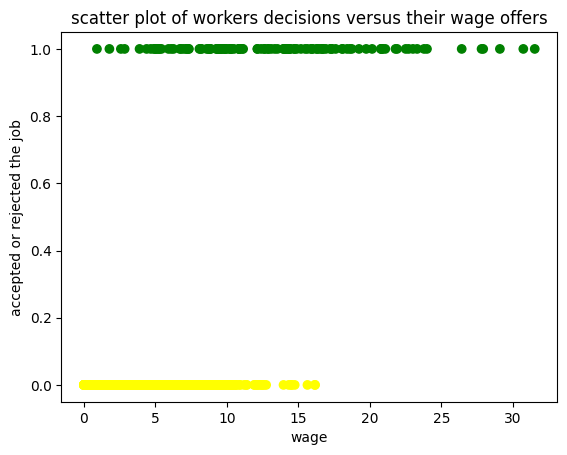

In [ ]:
import numpy as np
from scipy.stats import norm, expon
import matplotlib.pyplot as plt


def Utility(income, epsilon, alpha):
    return alpha*income + epsilon

def employment_choice(wage, z, epsilon, alpha):
    comparison = Utility(wage, epsilon[:,0], alpha) > Utility(z, epsilon[:,1], alpha)
    return np.where(comparison, 1, 0) # 1 for accepting the job


np.random.seed(1395)
params = {'lambda':0.2, 'sigma':3, 'alpha':1, 'z':12}
sample_size = 1000

wage = expon.rvs(loc=0, scale=1/params['lambda'], size = sample_size)
epsilon = norm.rvs(loc= 0, scale=params['sigma'], size =(sample_size, 2)) # each row is a person, each person has 2 columns, e for emp and unemp
# there is no distribution for hours of jobs, so I assumed h = 1
choices = employment_choice(wage, params['z'],epsilon,params['alpha'])
print(np.mean(choices))
# scatterplot
colors = np.where( choices == 1, 'green', 'yellow')  # Red if y > 3, otherwise blue
plt.scatter(wage, choices, c= colors)
plt.xlabel('wage')
plt.ylabel('accepted or rejected the job')
plt.title('scatter plot of workers decisions versus their wage offers')
plt.show()

## 5.2 Identification

$\alpha$ and $\sigma$ are not identified.
In this kind of choice models, we do not observe the level of the utility gained from the choices and we just know that utility gained from choosing A is bigger than the utility of choosing B. So we just observe the characteristics if the options, individuals, and the choices that they have made, ordinality of the utility and not the level of the utility. So even with differant variances of unobserved factors, the order of utility is not changed, so we have a variation but the outcomes that we are not changed. Thus, we can not identify the parameters $\sigma$ and $\alpha$ seperately.  
In different discrete choice models, we have different assumptions for the unobserved factor, $\epsilon$.

For example, in Logit, we assume that the unobserved factors are distributed as extreme value with variance $\frac{\pi^{2}}{6}$. So, we do a rescaling of the utility as follows (Train, chapter3):
Lets assume the utility has the form:
$$U_{ni}^\star =  V_{ni}+\epsilon_{ni}^\star$$
where the unobserved factors have the variance of $\sigma^{2} \times \frac{\pi^{2}}{6}$
because we need the variance of the error term be according to e.v. $\frac{\pi^{2}}{6}$ we rescale the utility, as:
$$U_{ni} =  \frac{V_{ni}}{\sigma}+\epsilon_{ni}$$
the variance of $\epsilon_{ni}$ is $\frac{\pi^{2}}{6}$. In logit form the choice probability is
$$P_{ni}=\frac{e^{\frac{V_{ni}}{\sigma}}}{\Sigma_j e^{\frac{V_{nj}}{\sigma}}}$$
we had $V_{ni}=\beta^\prime X_{ni}$
and the estimated parameters are $\frac{\beta}{\sigma}$


In our case, the $\epsilon$ has the variance of $\sigma^{2}$. so for example in logit we have to rescale the utility by $\sigma \times \frac{\pi}{\sqrt 6}$ and the estimated would be $\frac{\alpha}{\sigma}\times \frac{\sqrt 6}{\pi}$

In logit and nested logit models, the normalization for scale and level is automatic due to the distributional assumptions imposed on the error terms. Therefore, explicit consideration of normalization is unnecessary for these models. Conversely, in probit models, normalization for scale and level does not happen automatically, requiring researchers to normalize the model directly.

### Normalization of the model is related to parameter identification. A parameter is identified if it can be estimated, and is unidentified if it cannot be estimated

The above example was in the logit form, but in general the identified parameter of the model would be $\frac{\alpha}{\sigma}$ and we can not identify them seperately. So a larger variance in unobserved factors leasd to smaller coefficients. But maily we are interested in the ratio of defferent coefficients, and because the true parameters are scaled by the same factor, this will not change the ratios we are looking for. (But if the variance of unobserved factors are different for each descion maker, this would be different)



## 5.3 OLS, Logit and Probit

In [ ]:
import statsmodels.api as sm
import pandas as pd
data = pd.DataFrame({"Wage":wage, "Y":choices})
data = sm.add_constant(data)

x = data[["const", "Wage"]]
y = data["Y"]
#count_col1 = (data["Y"] == 0).sum()
#print(count_col1)
Logit_results = sm.Logit(y,x).fit()
Probit_results = sm.Probit(y,x).fit()
OLS_results = sm.OLS(y,x).fit()


coef = pd.DataFrame({"Logit":Logit_results.params, "Probit":Probit_results.params, "OLS": OLS_results.params}).T
print(coef)

Optimization terminated successfully.
         Current function value: 0.189977
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.189037
         Iterations 7
           const      Wage
Logit  -5.208714  0.444363
Probit -2.830227  0.239907
OLS    -0.090642  0.044593


### Predicted probabilities

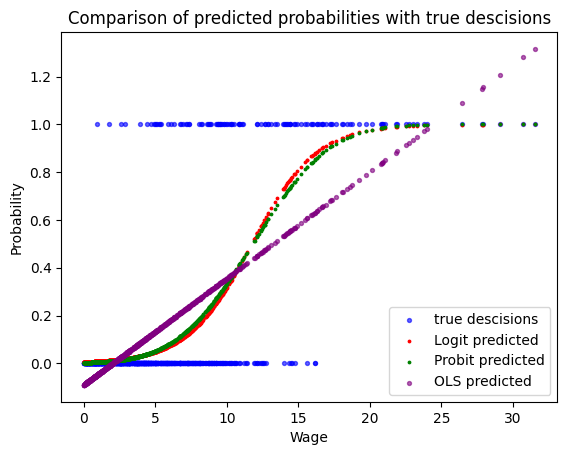

In [ ]:
Logit_predicted = Logit_results.predict(x)
Probit_predicted = Probit_results.predict(x)
OLS_predicted = OLS_results.predict(x)

predicted_probability = pd.DataFrame({"Logit":Logit_predicted, "Probit":Probit_predicted, "OLS":OLS_predicted})
#print(predicted_probability)


plt.scatter(data["Wage"], choices, label='true descisions', color = 'blue',alpha=0.6, s= 8)
plt.scatter(data["Wage"], predicted_probability["Logit"], label='Logit predicted', color = 'red', s=3)
plt.scatter(data["Wage"], predicted_probability["Probit"], label='Probit predicted', color = 'green', s= 3)
plt.scatter(data["Wage"], predicted_probability["OLS"], label='OLS predicted', color = 'purple',alpha=0.6, s= 8)

plt.legend()
plt.ylabel('Probability')
plt.xlabel('Wage')
plt.title('Comparison of predicted probabilities with true descisions')

plt.show()


### compare paramters

In [ ]:
Logit_calculated_coef = coef["Wage"]["Logit"]*params['sigma'] * np.sqrt(6) / np.pi
Probit_calculated_coef = coef["Wage"]["Probit"]*np.sqrt(2*params['sigma'] **2)

print("parameter alpha from Logit:  ", Logit_calculated_coef)
print("parameter alpha from Probit:  ", Probit_calculated_coef)

parameter alpha from Logit:   1.0394057396889995
parameter alpha from Probit:   1.0178379695492479


### Compare the estimated coefficient for wage rate in these three models, with each other and with the true parameter of interest. Why are they different? Does it mean that logit and probit are different? Interpret

he estimated coefficients vary across models, reflecting differences in their underlying assumptions. In ordinary least squares (OLS), where the dependent variable is continuous, we assume linearity in the parameters. Conversely, in probit and logit models, designed for binary dependent variables, we assume rationality in decision-making. The distinction between logit and probit lies in the distributional assumption of the error term: normal for probit and Gumbel for logit. Despite these differences, considering scaling shows that the estimated coefficients closely align across models, although some disparities persist due to their distinct assumptions. However, both logit and probit models share the common trait of being choice models.

### Finally, notice that even if the true model is not logit, but logit provides a very good approximation for the true parameters. Why?

The logit is a good approximation for the true choice probabilities because it exhibits desirable asymptotic properties, including consistency and efficiency, ensuring that as the sample size increases, the estimator converges towards the true parameter values with minimal variance. Secondly, its consistency remains intact regardless of whether the true model aligns with the assumptions of the Logit model. This means that even if the underlying model differs, the Logit estimator reliably estimates coefficients that approach the true values as the sample size grows.

### Compare predicted probabilities with the "true" decisions. What is the problem with OLS? Do Logit and Probit have different predictions?

OLS encounters challenges in choice models due to several reasons. Firstly, it may produce probabilities that are negative or exceed 1, which is problematic. Additionally, OLS does not incorporate the crucial rationality assumption inherent in choice models. Moreover, while choice models typically involve discrete outcomes, OLS operates as a continuous model, posing a mismatch.
Logit and Probit estimates exhibit slight variation, but they closely approximate the true parameter. As the sample size increases, the estimates converge towards the true parameter. However, it's important to note that the underlying assumptions differ between the Probit and Logit models.

# **6 Maximum Simulated Likelihood Estimator**

## 6.1 Identification

OLS encounters challenges in choice models due to several reasons. Firstly, it may produce probabilities that are negative or exceed 1, which is problematic. Additionally, OLS does not incorporate the crucial rationality assumption inherent in choice models. Moreover, while choice models typically involve discrete outcomes, OLS operates as a continuous model, posing a mismatch.
Logit and Probit estimates exhibit slight variation, but they closely approximate the true parameter. As the sample size increases, the estimates converge towards the true parameter. However, it's important to note that the underlying assumptions differ between the Probit and Logit models.

We know that in Robit models, unlike in the logit models which are scaled automatically, the researche has to normalize the model to have paramters that can be identifies. The normalization shoild consider the scale and level. Because these do not affect the choices that the descision maker makses, they can not help the indentification. So in an unnormalized model, some parameters may exist that are related to scale and level of utility and do not effect the behavior, therefor these parameters can not be estimated. I followed the procedure in Train. First to account for the fact that level of utility does not matter in the choices, we work with the differences of the utility. In this example we have two alternatives, so $J=2$. We work with the differnece of utility with respect to the first choice. So, we want to work with the covariance matrix $\tilde \Omega$, which has the parameters that can be estimated, instead if the covariance matrix $\Omega$.

$$
\Omega = \begin{bmatrix}
    \sigma_{00} & \sigma_{01} \\
    . & \sigma_{11}
\end{bmatrix}
$$

$\tilde \epsilon_{n10} = \epsilon_{n1} - \epsilon_{n0}$
to get the matrix of $\tilde \Omega$, we have to do make the matrix $M$, which is a identitiy matrix of dimension $J-1$ with a column of $-1$ in the $i^{\th}$ columns ($i$ is the alternative that is the base choice to get the differences, in this example $i$ is choosing employment). we get $\tilde \Omega = M \Omega M^{\prime}$

So:
$$
M = \begin{bmatrix}
-1&1
\end{bmatrix}
$$


$$
\tilde \Omega = \begin{bmatrix}
-1&1
\end{bmatrix}

\begin{bmatrix}
    \sigma_{00} & \sigma_{01} \\
    \sigma_{01} & \sigma_{11}
\end{bmatrix}

\begin{bmatrix}
-1 \\
1
\end{bmatrix}
= \sigma_{00} + \sigma_{11} - 2\sigma_{01}
$$

for more structue, we can assume that $\sigma_{01}$ is zero, which means there is no covariance between choosing alternative 1 or 2. and we can assume that $\sigma_{00}=2\sigma_{11}$. (we can have any linare relationship we want between these two parameters, according to our intuition or the economic model.)


## 6.2 Accept-Reject Simulator

In [ ]:
# first, again simulate the economy and get "true choices"
import numpy as np
from scipy.stats import *
import random
from scipy.optimize import minimize

def Utility(income, epsilon, alpha):
    return alpha*income + epsilon

def employment_choice(income, epsilon, alpha):
    comparison = Utility(income[:,0,0], epsilon[:,0], alpha) > Utility(income[:,1,0], epsilon[:,1], alpha)
    return np.where(comparison, 1, 0) # 1 for accepting the job


def data_generator(sample_size, params, repetition, option):
    np.random.seed(1395)
    # wage
    wage_n_1 = expon.rvs(loc=0, scale=1/params['lambda'], size = (sample_size, 1))
    wage = np.tile(wage_n_1[:, :, np.newaxis], (1, 1, repetition))
    z_matrix = params['z'] * np.ones((sample_size, 1, repetition))
    # matrix of income, first column, wage. second column, z
    income = np.concatenate((wage, z_matrix), axis=1)
    # unobserved factors
    epsilon_true = norm.rvs(loc= 0, scale=params['sigma'], size =(sample_size, option))
    # choices
    # from question 5
    choices = employment_choice(income,epsilon_true,params['alpha'])
    employment = choices.reshape(sample_size, 1)
    unemployment = 1 - employment
    # matrix, column1 for choosing employment, column 2: unemployment
    d = np.concatenate((employment, unemployment), axis=1)
    return d, income


In [ ]:
import numpy as np
from scipy.stats import norm, expon
import matplotlib.pyplot as plt


params = {'lambda':0.2, 'sigma':3, 'alpha':1, 'z':12}
sample_size = 1000
repetition = 100
option = 2
np.random.seed(1395)
# wage
true_choices, income = data_generator(sample_size, params, repetition, option)
# first axis=depth
# second axis = rows
# 3rd = columns

def utility(income, unobserved_factor, alpha):
    return alpha*income + unobserved_factor

def accept_reject(income, unobserved_factor, alpha):
    comparison = utility(income[:,0,:], unobserved_factor[:,0,:], alpha) > utility(income[:,1,:], unobserved_factor[:,1,:], alpha)
    return np.where(comparison, 1, 0)# rows show the repetition, clincome[:,0,:]oumns show each individual

def simulated_probability(income, alpha, sigma, repetition, sample_size, random_seed):
    np.random.seed(random_seed)
    epsilon = norm.rvs(loc= 0, scale=sigma, size = (sample_size, 2, repetition))
    choice_result = accept_reject(income, epsilon, alpha)
    accept_prob = np.mean(choice_result, axis = 1)
    reject_prob = 1 - accept_prob
    # simulated probabilities for accepting are a 1 dim array
    # create a J * N matrix, rows for options, each column for the simulated probability for person i choosing option j.
    employment_simulated = accept_prob.reshape(sample_size,1)
    unemployment_simulated = reject_prob.reshape(sample_size,1)
    simul_prob = np.concatenate((employment_simulated, unemployment_simulated), axis=1)
    return simul_prob # N*J matrix, first row: accepting a job



simulated_pr = simulated_probability(income, params['alpha'], params['sigma'], repetition, sample_size, 1395)
print(np.mean(simulated_pr, axis = 0))
#x_axis=np.linspace(0,sample_size,sample_size)
#plt.scatter(x_axis,simul_pr[:,0], s= 0.4)
#plt.show()


[0.11899 0.88101]


In [ ]:
def SLL(alpha, sigma, true_choices, income):
    # x[0]: alpha
    # x[1]: sigma
    simul_pr = simulated_probability(income, alpha, sigma, repetition, sample_size, 1395)
    eps = 1e-5  # Small epsilon value !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    simul_pr = np.maximum(simul_pr, eps)  # Ensure simul_pr is not zero   !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    sll = np.sum(true_choices*np.log(simul_pr))
    return sll

### trying to find both $\alpha$ and $\sigma$

In [ ]:
alpha_range = np.linspace(0.5, 1.5, 50)
sigma_range = np.linspace(2.5, 3.5, 50)

z_grid = np.zeros((len(alpha_range), len(sigma_range)))  # Initialize the grid for function values
for i in range(len(alpha_range)):
    for j in range(len(sigma_range)):
        z_grid[i, j] = SLL(alpha_range[i], sigma_range[j], true_choices, income)


In [ ]:
max_indices = np.unravel_index(np.argmax(z_grid), z_grid.shape)
max_alpha = alpha_range[max_indices[0]]
max_sigma = sigma_range[max_indices[1]]


print("(alpha, sigma):", max_alpha, max_sigma)


(alpha, sigma): 0.7653061224489796 2.7857142857142856


## 6.2.1 Start Small

### we know $\alpha$. trying to find $\sigma$

In [ ]:
params = {'lambda':0.2, 'sigma':3, 'alpha':1, 'z':12}
sample_size = 50
repetition = 100000
option = 2
np.random.seed(1395)
# wage
true_choices, income = data_generator(sample_size, params, repetition, option)

sigma_range = np.linspace(2, 4, 100)

z_grid_sigma = np.zeros(len(sigma_range))  # Initialize the grid for function values
for j in range(len(sigma_range)):
    z_grid_sigma[j] = SLL(params['alpha'], sigma_range[j], true_choices, income)

In [ ]:
max_indices = np.unravel_index(np.argmax(z_grid_sigma), z_grid_sigma.shape)
max_sigma = sigma_range[max_indices]


print("sigma for N=50:",  max_sigma)
#print(z_grid_sigma)

sigma for N=50: 3.5151515151515156


### we know $\sigma$. trying to find $\alpha$

In [ ]:
alpha_range = np.linspace(0.5, 1.5, 50)

z_grid_alpha = np.zeros(len(alpha_range))  # Initialize the grid for function values
for i in range(len(alpha_range)):
    z_grid_alpha[i] = SLL(alpha_range[i], params['sigma'], true_choices, income)

In [ ]:
max_indices = np.unravel_index(np.argmax(z_grid_alpha), z_grid_alpha.shape)
max_alpha = alpha_range[max_indices]

print("alpha for N=50:",  max_alpha)


alpha for N=50: 0.846938775510204


### trying to get  results with $N=1500$

In [ ]:
params = {'lambda':0.2, 'sigma':3, 'alpha':1, 'z':12}
sample_size = 1500
repetition = 100000
option = 2
np.random.seed(1395)
# wage
true_choices, income = data_generator(sample_size, params, repetition, option)


alpha_range = np.linspace(0.5, 1.5, 20)
sigma_range = np.linspace(2, 4, 20)
z_grid_alpha_1500 = np.zeros(len(alpha_range))
z_grid_sigma_1500 = np.zeros(len(sigma_range))

for j in range(len(sigma_range)):
    z_grid_sigma_1500[j] = SLL(params['alpha'], sigma_range[j], true_choices, income)

for i in range(len(alpha_range)):
    z_grid_alpha_1500[i] = SLL(alpha_range[i], params['sigma'], true_choices, income)

In [ ]:
max_indices_sigma_1500 = np.unravel_index(np.argmax(z_grid_sigma_1500), z_grid_sigma_1500.shape)
max_sigma_1500 = sigma_range[max_indices_sigma_1500]
max_indices_alpha_1500 = np.unravel_index(np.argmax(z_grid_alpha_1500), z_grid_alpha_1500.shape)
max_alpha_1500 = alpha_range[max_indices_sigma_1500]

print("alpha for N=1500:",  max_alpha_1500)
print("sigma for N=1500:",  max_sigma_1500)

alpha for N=1500: 1.026315789473684
sigma for N=1500: 3.052631578947368


### What are the limitations of Accept-Reject simulator?

One limitation lies in the lack of smoothness of the simulated probabilities concerning the parameters, as they lack second-order differentiability. Additionally, there's a possibility that all R draws of the error terms lead to rejection, resulting in a simulated probability of zero for certain alternatives. Moreover, enlarging the simulation size significantly slows down computation. Furthermore, when the simulated probabilities lack smoothness, resembling step functions without gradients, slight increments in alpha may not induce changes in likelihood, rendering the model insensitive. Consequently, the maximizer struggles to discern the direction for optimal alpha adjustment.

we know that the integral $\int I(.)\phi(\epsilon_{n})d\epsilon$ is approximated by $\frac{1}{R}\Sigma I^{r}(.)$. Also we know that $\check{P_{ni}}$ is unbiased for $P_{ni}$. As we have $E(\check{P_{ni}})= \frac{1}{R}\Sigma P_{ni}$, where the expectation is over different sets of R draws. The variance of the simulates probability over different sets of draws decreases as the number of draws rises. So when N increases, if they are not independent from each other, the variance of probabilities would increase, in order to maintain a low variance for the simulated  probabiltity, the number of draws have to increase to reduce the variance. But if the sample draws are independent and choices are independent there is no difference between having a large sample with smaller draw numbers or a small sample with larger number of draws. Also with low probabilties like in this question, we should increase the number of draws to get probability other than zero, as the sample size increases, we should increase the size even more. but there is a problem that if the researcher continues taking draws until at least one accept is obtained for each decision maker, then the number of draws becomes a function of the probabilities. The simulation process is then not independent of the choice process that is being modeled

## 6.3 Smoothed Accept-Reject Simulator

In [ ]:
def utility_value(income, unobserved_factor, alpha):
    return (alpha*income + unobserved_factor)


def smoothed_AR_simulator(income, alpha, sigma, sample_size, repetition, option, scale_factor, seed_number):
    np.random.seed(seed_number)
    epsilon = norm.rvs(loc=0, scale=sigma, size=(sample_size, option, repetition))
    utility_matrix = utility_value(income, epsilon, alpha)
    exp_utility = np.exp(utility_matrix/scale_factor)
    sum_exp_utility = np.sum(exp_utility, axis = 1)
    sum_exp_utility_reshape = sum_exp_utility.reshape(sample_size, 1, repetition)
    logistic = exp_utility/sum_exp_utility_reshape
    simul_prob = np.mean(logistic, axis=2)
    return simul_prob

# finding sigma and alpha
def smoothed_AR_SLL(alpha, sigma, true_choices, income, sample_size, repetition, option, scale_factor, seed_number):
    simul_prob = smoothed_AR_simulator(income, alpha, sigma, sample_size, repetition, option, scale_factor, seed_number)
    return np.sum(true_choices*np.log(simul_prob))


In [ ]:
params = {'lambda':0.2, 'sigma':3, 'alpha':1, 'z':12}
sample_size = 50
repetition = 100000
option = 2
scale_factor = 0.8
true_choices, income = data_generator(sample_size, params, repetition, option)

In [ ]:
alpha_range = np.linspace(0.5, 1.5, 50)
sigma_range = np.linspace(2.5, 3.5, 50)

z_smoothed_grid = np.zeros((len(alpha_range), len(sigma_range)))
for i in range(len(alpha_range)):
    for j in range(len(sigma_range)):
        z_smoothed_grid[i, j] = smoothed_AR_SLL(alpha_range[i], sigma_range[j], true_choices, income, sample_size, repetition, option, scale_factor, 1395)


In [ ]:
max_indices = np.unravel_index(np.argmax(z_smoothed_grid), z_smoothed_grid.shape)
max_alpha = alpha_range[max_indices[0]]
max_sigma = sigma_range[max_indices[1]]
print("(alpha, sigma):", max_alpha, max_sigma)

(alpha, sigma): 1.030612244897959 3.4591836734693877


Finding $\alpha$ and $\sigma$ seperatley

In [ ]:
alpha_range = np.linspace(0.5, 1.5, 50)
sigma_range = np.linspace(2, 4, 100)
z_grid_alpha_smoothed = np.zeros(len(alpha_range))
z_grid_sigma_smoothed = np.zeros(len(sigma_range))

for j in range(len(sigma_range)):
    z_grid_sigma_smoothed[j] = smoothed_AR_SLL(params['alpha'], sigma_range[j], true_choices, income, sample_size, repetition, option, scale_factor, 1395)

for i in range(len(alpha_range)):
    z_grid_alpha_smoothed[i] = smoothed_AR_SLL(alpha_range[i], params['sigma'], true_choices, income, sample_size, repetition, option, scale_factor, 1395)

In [ ]:
max_indices_sigma_smoothed = np.unravel_index(np.argmax(z_grid_sigma_smoothed), z_grid_sigma_smoothed.shape)
max_sigma_smoothed = sigma_range[max_indices_sigma_smoothed]
max_indices_alpha_smoothed = np.unravel_index(np.argmax(z_grid_alpha_smoothed), z_grid_alpha_smoothed.shape)
max_alpha_smoothed = alpha_range[max_indices_alpha_smoothed]

print("alpha for N=50:",  max_alpha_smoothed)
print("sigma for N=50:",  max_sigma_smoothed)

alpha for N=50: 0.9081632653061225
sigma for N=50: 3.353535353535354


In [ ]:
params = {'lambda':0.2, 'sigma':3, 'alpha':1, 'z':12}
sample_size = 1500
repetition = 100000
option = 2
scale_factor = 0.8
np.random.seed(1395)
# wage
true_choices, income = data_generator(sample_size, params, repetition, option)


alpha_range = np.linspace(0.5, 1.5, 20)

z_grid_alpha_smoothed_1500 = np.zeros(len(alpha_range))

for i in range(len(alpha_range)):
    z_grid_alpha_smoothed_1500[i] = SLL(alpha_range[i], params['sigma'], true_choices, income)

In [ ]:
max_indices_alpha_smoothed_1500 = np.unravel_index(np.argmax(z_grid_alpha_smoothed_1500), z_grid_alpha_smoothed_1500.shape)
max_alpha_smoothed_1500 = alpha_range[max_indices_alpha_smoothed_1500]

print("alpha for N=1500:",  max_alpha_smoothed_1500)

alpha for N=1500: 0.9736842105263157


We can mitigate the problems with accept-reject simulator by replacing the indicator function with a smooth, strictly positive function. Any function which rises as the utility rises is a valid choice. Logit function is a smooth, strictly positive function, which gives values between 0 and 1. we use $\lambda$, the scaling factor, which determines the degree of smoothing. Doing this reduces the difficulties in finding the maximum in accept-reject simulator. Furthermore, because the simulated probabilties are no longer sum of oness and zeros, but sums of logit probabilties in between 0 and 1, the simulated likelihood has broader range. We see that by increasing the sample size, we get estimates very close to the true value of $\alpha$

## Q6- with python optimizer

In [ ]:
import numpy as np
from scipy.stats import norm, expon
import matplotlib.pyplot as plt

np.random.seed(1395)
params = {'lambda':0.2, 'sigma':3, 'alpha':1, 'z':12}
sample_size = 1000
repetition = 100
# wage
wage_n_1 = expon.rvs(loc=2, scale=1/params['lambda'], size = (sample_size, 1))
wage = np.tile(wage_n_1[:, :, np.newaxis], (1, 1, repetition))

def utility(income, unobserved_factor, alpha):
    return alpha*income + unobserved_factor

def accept_reject(wage, z, unobserved_factor, alpha):
    comparison = utility(wage[:,0,:], unobserved_factor[:,0,:], alpha) > utility(z, unobserved_factor[:,1,:], alpha)
    return np.where(comparison, 1, 0) # rows show the repetition, cloumns show each individual


def simulated_probability(wage, z, alpha, sigma, repetition, sample_size):
    np.random.seed(1395)
    epsilon = norm.rvs(loc= 0, scale=sigma, size = (sample_size, 2, repetition))

    choice_result = accept_reject(wage, z, epsilon, alpha)
    accept_prob = np.sum(choice_result, axis = 1) / repetition
    reject_prob = 1 - accept_prob

    # simulated probabilities for accepting are a 1 dim array
    # create a J * N matrix, rows for options, each column for the simulated probability for person i choosing option j.
    employment_simulated = accept_prob.reshape(sample_size,1)
    unemployment_simulated = reject_prob.reshape(sample_size,1)
    simul_prob = np.concatenate((employment_simulated, unemployment_simulated), axis=1)
    return simul_prob # J*N matrix, first row: accepting a job



simul_pr = simulated_probability(wage, params['z'], params['alpha'], params['sigma'], repetition, sample_size)

In [ ]:
from scipy.optimize import minimize
import random
random.seed(1395)
# remember from the previous question that we stored choices of the employment on the 1 dim array: choices
# create a N*J matrix of the actual choices made, each row if for an individual. each column for an option. all arrays are zero excep the one chosen.
# here, we had 2 options. and in choices array, we had the results for choosing option 1, which was employment

sample_size = 1000
repetition = 100

# random draws for wages
wage_n_1 = expon.rvs(loc=2, scale=1/params['lambda'], size = (sample_size, 1))
wage = np.tile(wage_n_1[:, :, np.newaxis], (1, 1, repetition))

# random draws for epsilon
epsilon_true = norm.rvs(loc= 0, scale=params['sigma'], size =(sample_size, 2))
choices = employment_choice(wage[:,0,0], params['z'],epsilon_true,params['alpha'])

# simulate the descion making of economy (like question 5)
employment = choices.reshape(sample_size, 1)
unemployment = 1 - employment
# true descisions
d = np.concatenate((employment, unemployment), axis=1)


def SLL(x, true_choices):
    random.seed(1395)
    # x[0]: alpha
    # x[1]: sigma
    simul_pr = simulated_probability(wage, params['z'], x[0], x[1], repetition, sample_size)
    epsilon = 1e-10  # Small epsilon value
    #simul_pr = np.maximum(simul_pr, epsilon)  # Ensure simul_pr is not zero
    sll = np.sum(true_choices*np.log(simul_pr))
    return -sll

true_choices = d
# Initial guess
initial_guess = [1, 3]
# Minimize the objective function
result = minimize(SLL, initial_guess,args=(true_choices,), method='Nelder-Mead')
# 'Nelder-Mead' This method is a derivative-free optimization algorithm suitable for optimizing functions that are not differentiable or when gradient information is unavailable.
print("Optimal solution:", result.x)
print("Objective function value at optimal solution:", result.fun)
print("number of it", result.nit)



C:\Users\Asus\AppData\Local\Temp\ipykernel_11388\149267108.py:33: RuntimeWarning: divide by zero encountered in log
  sll = np.sum(true_choices*np.log(simul_pr))
C:\Users\Asus\AppData\Local\Temp\ipykernel_11388\149267108.py:33: RuntimeWarning: invalid value encountered in multiply
  sll = np.sum(true_choices*np.log(simul_pr))


Optimal solution: [1. 3.]
Objective function value at optimal solution: nan
number of it 100


In [ ]:
np.random.seed(1395)
params = {'lambda':0.2, 'sigma':3, 'alpha':1, 'z':12}
sample_size = 50
repetition = 100000
# wage
wage_n_1 = expon.rvs(loc=2, scale=1/params['lambda'], size = (sample_size, 1))
wage = np.tile(wage_n_1[:, :, np.newaxis], (1, 1, repetition))
# first axis=depth
epsilon_true = norm.rvs(loc= 0, scale=params['sigma'], size =(sample_size, 2))
choices = employment_choice(wage[:,0,0], params['z'],epsilon_true,params['alpha'])

employment = choices.reshape(sample_size, 1)
unemployment = 1 - employment
d = np.concatenate((employment, unemployment), axis=1)

def SLL_2(x, true_choices):
    random.seed(1395)
    # x[0]: alpha
    # x[1]: sigma
    simul_pr = simulated_probability(wage, params['z'], params['alpha'], x, repetition, sample_size)
    sll = np.sum(true_choices*np.log(simul_pr))
    return -sll

true_choices = d
# Initial guess
initial_guess = [3]

# Minimize the objective function
result = minimize(SLL_2, initial_guess,args=(true_choices,), method='Nelder-Mead')
# 'Nelder-Mead' This method is a derivative-free optimization algorithm suitable for optimizing functions that are not differentiable or when gradient information is unavailable.
print("Optimal solution:", result.x)
print("Objective function value at optimal solution:", result.fun)
print("number of it", result.nit)

Optimal solution: [4.33293457]
Objective function value at optimal solution: 20.144067661671595
number of it 17


## smoothed accept-reject

In [ ]:
# first, again simulate the economy and get "true choices"
import numpy as np
from scipy.stats import *
import random
from scipy.optimize import minimize

def Utility(income, epsilon, alpha):
    return alpha*income + epsilon

def employment_choice(income, epsilon, alpha):
    comparison = Utility(income[:,0,0], epsilon[:,0], alpha) > Utility(income[:,1,0], epsilon[:,1], alpha)
    return np.where(comparison, 1, 0) # 1 for accepting the job


def data_generator(sample_size, params, repetition, option):
    np.random.seed(1395)
    # wage
    wage_n_1 = expon.rvs(loc=0, scale=1/params['lambda'], size = (sample_size, 1))
    wage = np.tile(wage_n_1[:, :, np.newaxis], (1, 1, repetition))
    z_matrix = params['z'] * np.ones((sample_size, 1, repetition))
    # matrix of income, first column, wage. second column, z
    income = np.concatenate((wage, z_matrix), axis=1)
    # unobserved factors
    epsilon_true = norm.rvs(loc= 0, scale=params['sigma'], size =(sample_size, option))
    # choices
    # from question 5
    choices = employment_choice(income,epsilon_true,params['alpha'])
    employment = choices.reshape(sample_size, 1)
    unemployment = 1 - employment
    # matrix, column1 for choosing employment, column 2: unemployment
    d = np.concatenate((employment, unemployment), axis=1)
    return d, income

In [ ]:

def utility_value(income, unobserved_factor, alpha):
    return (alpha*income + unobserved_factor)



def smoothed_AR_simulator(income, alpha, sigma, sample_size, repetition, option, scale_factor, seed_number):
    np.random.seed(seed_number)
    epsilon = norm.rvs(loc=0, scale=sigma, size=(sample_size, option, repetition))
    utility_matrix = utility_value(income, epsilon, alpha)/scale_factor
    exp_utility = np.exp(utility_matrix)
    sum_exp_utility = np.sum(exp_utility, axis = 1)
    sum_exp_utility_reshape = sum_exp_utility.reshape(sample_size, 1, repetition)
    logistic = exp_utility/sum_exp_utility_reshape
    simul_prob = np.mean(logistic, axis=2)
    return simul_prob


# just finding sigma
def smoothed_AR_SLL(x, true_choices, income, alpha, sample_size, repetition, option, scale_factor, seed_number):
    simul_prob = smoothed_AR_simulator(income, alpha, x, sample_size, repetition, option, scale_factor, seed_number)
    sll = np.sum(true_choices*np.log(simul_prob))
    return -sll

# finding sigma and alpha
def smoothed_AR_SLL_2(x, true_choices, income, sample_size, repetition, option, scale_factor,seed_number):
    simul_prob = smoothed_AR_simulator(income, x[0], x[1], sample_size, repetition, option, scale_factor,seed_number)
    sll_2 = np.sum(true_choices*np.log(simul_prob))
    return -sll_2



# just finding sigma
def smoothed_AR_SLL_Alpha(x, true_choices, income, sigma , sample_size, repetition, option, scale_factor,seed_number):
    simul_prob = smoothed_AR_simulator(income, x, sigma, sample_size, repetition, option, scale_factor,seed_number)
    sll_3 = np.sum(true_choices*np.log(simul_prob))
    #print("sll,", sll)
    return -sll_3


In [ ]:
params = {'lambda':0.2, 'sigma':3, 'alpha':1, 'z':12}
sample_size = 50
repetition = 100000
option = 2
scale_factor = 0.8
true_choices, income = data_generator(sample_size, params, repetition, option)
#np.random.seed(None)
initial_guess_1 = 3
initial_guess_2 = [1,3]
initial_guess_3 = 1
# Minimize the objective function
result_1 = minimize(smoothed_AR_SLL, initial_guess_1,args=(true_choices, income, params['alpha'], sample_size, repetition, option, scale_factor, 1395),  method='Nelder-Mead')
result_3 = minimize(smoothed_AR_SLL_Alpha, initial_guess_3, args=(true_choices, income, params['sigma'], sample_size, repetition, option, scale_factor,1395),  method='Nelder-Mead')

C:\Users\Asus\AppData\Local\Temp\ipykernel_11388\3859228281.py:10: RuntimeWarning: overflow encountered in exp
  exp_utility = np.exp(utility_matrix)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11388\3859228281.py:13: RuntimeWarning: invalid value encountered in divide
  logistic = exp_utility/sum_exp_utility_reshape


In [ ]:
print("Optimal solution for sigma:",result_1.x)
print("number of iteration", result_1.nit)

print("Optimal solution for alpha:",result_3.x)
print("number of iteration", result_3.nit)

Optimal solution for sigma: [3.34885254]
number of iteration 13
Optimal solution for alpha: [0.90556641]
number of iteration 12


# **8 Random Utility Model: Mixed Logit**

We can conditionally write the probability function as follows: \\
$L_{ni}(\beta_n)=\frac{e^{\beta_n^\prime x_{ni}}}{\Sigma_j e^{\beta_n^\prime x_{nj}}}$ \\
But considering that the $\beta$ value of people is unobservable, we have to average conditional probability over all possible $\beta$'s to calculate the probability: \\
$P_{ni} = \int \frac{e^{\beta_n^\prime x_{ni}}}{\Sigma_j e^{\beta_n^\prime x_{nj}}} f(\beta) d\beta$ \\
Now we use Monte Carlo simulation to estimate the above integral: \\
$\check{P}_{ni} = \frac{1}{R} \sum\limits_{r=1}^R L_{ni}(\beta_r)$ \\
Now we use the simulated maximum likelihood to estimate the parameters: \\
$\hat{\Theta}_{MSL} = \underset{\Theta}{argmax} \sum\limits_{n=1}^N \sum\limits_{j=1}^J y_{nj} \; log \check{P}_{nj}(\Theta)$

In [126]:
import random

import numpy as np
from scipy.optimize import minimize
from scipy.stats import *
from tqdm import tqdm

Before implementing the above process, we first implement the data generation module. The only difference between this section and the corresponding section in question 6 is that the alpha values ​​take a random value instead of a fixed value, whose logarithm follows a normal distribution:

In [135]:
def Utility(income, epsilon, alpha):
    return alpha.flatten() * income + epsilon


def employment_choice(income, epsilon, alpha):
    comparison = Utility(income[:,0,0], epsilon[:,0], alpha) > \
                 Utility(income[:,1,0], epsilon[:,1], alpha)
    return np.where(comparison, 1, 0)


def data_generator(sample_size, params, repetition, option):

    wage_n_1 = expon.rvs(
        loc=0, scale=1/params['lambda'], size = (sample_size, 1)
    )

    wage = np.tile(wage_n_1[:, :, np.newaxis], (1, 1, repetition))
    z_matrix = params['z'] * np.ones((sample_size, 1, repetition))

    income = np.concatenate((wage, z_matrix), axis=1)

    epsilon_true = norm.rvs(
        loc= 0, scale=params['epsilon_sigma'], size =(sample_size, option)
    )

    alpha_true = norm.rvs(
        loc=params['alpha_mean'], scale=params['alpha_sigma'],
        size =(sample_size, 1)
    )

    choices = employment_choice(income, epsilon_true, alpha_true)
    employment = choices.reshape(sample_size, 1)
    unemployment = 1 - employment
    d = np.concatenate((employment, unemployment), axis=1)

    return d, income

Now we use the above methods and generate a sample with the size of 1000. We consider the true value of the mean and std of the $\alpha$ distribution as 1 and 2 respectively:

In [140]:
params = {
    'lambda':0.2, 'epsilon_sigma': 0.5,
    'alpha_mean':1, 'alpha_sigma':2, 'z':12
}
sample_size = 1000
repetition = 100
option = 2
np.random.seed(1395)

true_choices, income = data_generator(sample_size, params, repetition, option)

Now we implement the methods needed to estimate the parameters using maximum simulated likelihood (MSL):

In [141]:
def logit(income, alpha):
    expanded_alpha = np.tile(alpha[:, np.newaxis, :], (1, 2, 1))
    utility_matrix = income * expanded_alpha
    exp_utility = np.exp(utility_matrix)
    sum_exp_utility = np.sum(exp_utility, axis = 1)
    sum_exp_utility_reshape = sum_exp_utility.reshape(
        alpha.shape[0], 1, alpha.shape[1]
    )
    logistic = exp_utility/sum_exp_utility_reshape
    return logistic.mean(axis=2)

In [142]:
def simulated_probability(
    income, alpha_mean, alpha_sigma, repetition, sample_size
):

    alpha = norm.rvs(
        loc=alpha_mean, scale=alpha_sigma,
        size = (sample_size, repetition)
    )
    simul_prob = logit(income, alpha)
    return simul_prob


def SLL(
    alpha_mean, alpha_sigma, true_choices,
    income, repetition, sample_size
):
    simul_pr = simulated_probability(
        income, alpha_mean, alpha_sigma, repetition, sample_size
    )
    eps = 1e-8
    simul_pr = np.maximum(simul_pr, eps)
    sll = np.sum(true_choices*np.log(simul_pr))
    return sll

Now we estimate the value of $\alpha$:

In [153]:
alpha_range = np.linspace(0.5, 1.5, 200)

z_grid_alpha = np.zeros(len(alpha_range))
for i in range(len(alpha_range)):
    z_grid_alpha[i] = SLL(
        alpha_range[i], params['alpha_sigma'], true_choices,
        income, repetition, sample_size
    )

max_indices = np.unravel_index(
    np.argmax(z_grid_alpha), z_grid_alpha.shape
)
max_alpha = alpha_range[max_indices]

print(f"Estimated alpha:  {max_alpha:.4f}")

Estimated alpha:  0.9824


Now we estimate the value of $\sigma$:

In [152]:
sigma_range = np.linspace(1, 3, 200)

z_grid_sigma = np.zeros(len(sigma_range))

for j in range(len(sigma_range)):
    z_grid_sigma[j] = SLL(
        params['alpha_mean'], sigma_range[j], true_choices,
        income, repetition, sample_size
    )

max_indices = np.unravel_index(
    np.argmax(z_grid_sigma), z_grid_sigma.shape
)
max_sigma = sigma_range[max_indices]

print(f"Estimated Sigma:  {max_sigma:.4f}")

Estimated Sigma:  1.9548


Also, in addition to manual optimization of the simulated likelihood function, we implement another method that uses the scipy package to optimize the simulated likelihood function:

In [160]:
estimated_alpha = optimize.minimize(
    lambda alpha: -SLL(
        alpha, params['alpha_sigma'], true_choices,
        income, repetition, sample_size
    ),
    1.5, method='nelder-mead',
    options={'xatol': 1e-8, 'disp': False}
).x[0]


estimated_sigma = optimize.minimize(
    lambda sigma: -SLL(
        params['alpha_mean'], sigma, true_choices,
        income, repetition, sample_size
    ),
    1.5, method='nelder-mead',
    options={'xatol': 1e-8, 'disp': False}
).x[0]

print(f"Estimated alpha:  {estimated_alpha:.4f}")
print(f"Estimated sigma:  {estimated_sigma:.4f}")

Estimated alpha:  1.2000
Estimated sigma:  1.7578


# **9 Monte-Carlo Simulation of firms behavior**

**1. Setup a firm's problem..**

Every firm has a specific production function in terms of labor and wages. Therefore, to produce any given amount of production, a certain amount of labor must be considered. Therefore, for each level of production, the amount of cost is known ($w\times (\frac{y}{A})^{\frac{1}{\alpha}}$). On the other hand, the market demand for the product is also known in terms of price, and in order for the product to have as much demand as production, the maximum possible price is obtained. And thus, for each level of production, the amount of price is known. Therefore, for each level of production, income and cost are obtained through these 2 mechanisms. Now, the company must adjust its labor, production and price so that both the above terms apply and the company's profit is maximized. \\
In mathematical terms, firm's problem can be written: \\
$income = py$ \\
$cost = w \times l + f_0$ \\
$ \rightarrow firm's \; problem : argmax_p ( py - w \times l - f_0 ) \quad st:  y \leq Y\left(\frac{p}{P}\right)^{-\sigma} \quad \& \quad y \leq Al^\alpha$

**2. Solve for the firm's price (Hint: it's constant markup over marginal cost).**

The cost function is a strictly increasing function of $l$. Therefore, for a specific production level, the amount of labor that minimizes the cost function is obtained through the following term: \\
$l^* = (\frac{y}{A})^{\frac{1}{\alpha}}$ \\
Also, the revenue function is a strictly increasing function of the production quantity ($y$) and the profit function is also a strictly increasing function of the revenue. Therefore, for a specific price, the production that maximizes the firm's profit is equal to the maximum market demand at this specific price. So we can write: \\
$y^* = Y(\frac{p}{P})^{-\sigma}$ \\
Therefore, we can rewrite the company's problem as follows: \\
$argmax_p (p \times y^* - w \times l^* - f_0)$ \\
$= argmax_p (p \times y^* - w \times l^* - f_0)$ \\
$ = argmax_p (p \times Y(\frac{p}{P})^{-\sigma} - w \times (\frac{Y}{A} (\frac{p}{P})^{-\sigma})^{\frac{1}{\alpha}} - f_0)$ \\
$F.O.C. \: : \frac{\partial}{\partial p}(p \times Y(\frac{p}{P})^{-\sigma} - w \times (\frac{Y}{A} (\frac{p}{P})^{-\sigma})^{\frac{1}{\alpha}} - f_0) = 0$ \\
$\rightarrow (1-\sigma)Y(\frac{p}{P})^{-\sigma} + w \sigma \frac{1}{\alpha} (\frac{Y}{A})^\frac{1}{\alpha} (\frac{1}{P})^\frac{-\sigma}{\alpha}p^{\frac{-\sigma}{\alpha}-1}$  \\
$\rightarrow ((\sigma - 1)YP^\sigma)p^{-\sigma} =  (w \sigma \frac{1}{\alpha} (\frac{Y}{A})^\frac{1}{\alpha}(\frac{1}{P})^\frac{-\sigma}{\alpha})p^{\frac{-\sigma}{\alpha}-1} $ \\
$\rightarrow ((\sigma - 1)YP^\sigma)p^{-\sigma + \frac{\sigma}{\alpha} + 1} = (w \sigma \frac{1}{\alpha} (\frac{Y}{A})^\frac{1}{\alpha}(\frac{1}{P})^\frac{-\sigma}{\alpha})$ \\
$\rightarrow p^* = (\frac{(w \sigma \frac{1}{\alpha} (\frac{Y}{A})^\frac{1}{\alpha}(\frac{1}{P})^\frac{-\sigma}{\alpha}}{((\sigma - 1)YP^\sigma)})^{\frac{1}{-\sigma + \frac{\sigma}{\alpha} + 1}}$

**3. Determine the threshed ($A_0$) a firm enters the domestic market.**

As it is known, the lower the productivity or, in other words, the smaller the value of $A$, the lower the production and thus the income and profit. Therefore, if $A$ is less than a certain threshold, the profit of the firm will be negative and as a result, it will not enter the market. This threshold is the limit that makes the profit of the firm exactly equal to zero: (We must use optimal price or $p^*$ in the calculations) \\
$profit = p^* \times Y(\frac{p^*}{P})^{-\sigma} - w \times (\frac{Y}{A} (\frac{p^*}{P})^{-\sigma})^{\frac{1}{\alpha}} - f_0$ \\
$profit = 0 \; \rightarrow \; p^* \times Y(\frac{p^*}{P})^{-\sigma} - w \times (\frac{Y}{A_0} (\frac{p^*}{P})^{-\sigma})^{\frac{1}{\alpha}} - f_0 = 0$ \\
$\rightarrow p^* \times Y(\frac{p^*}{P})^{-\sigma} - f_0 = w \times (Y (\frac{p^*}{P})^{-\sigma})^{\frac{1}{\alpha}} (\frac{1}{A_0})^{\frac{1}{\alpha}}$ \\
$\rightarrow A_0 = \frac{w^\alpha \: Y (\frac{p^*}{P})^{-\sigma}}{(p^* \times Y(\frac{p^*}{P})^{-\sigma} - f_0)^\alpha}$ \\
Therefore, if A is smaller than this threshold, the firm will not enter the domestic market.

In [113]:
import copy
from scipy import optimize

def required_labor(production_quantity, A, alpha):
  labor = (production_quantity/A) ** (1/alpha)
  return labor

def profit_function(p, w, sigma, alpha, Y, A, P, f0):
  y = Y * (p/P)**(-sigma)
  l = required_labor(y, A, alpha)
  revenue = y * p
  cost = l * w + f0
  profit_value = revenue - cost
  return profit_value

def minimum_productivity(A_init, w, alpha, Y, P, sigma, f0):
  A0 = optimize.root(
      lambda A: -optimize.minimize(
          lambda p: -profit_function(p, w, sigma, alpha, Y, A, P, f0),
          params['P'], method='nelder-mead',
          options={'xatol': 1e-8, 'disp': False}
      ).fun,
      A_init
  ).x[0]

  return A0

params = {
    'w': 6,
    'A_init': 1,
    'sigma': 2.4,
    'P': 1,
    'Y': 100,
    'alpha': 0.5,
    'f0': 1.2
}

A0 = minimum_productivity(**params)

print(f"Minimum required productivity for given parameters: {A0:.4f}")

Minimum required productivity for given parameters: 0.3207


Now we draw the minimum required productivity in terms of two variables: fixed cost and labor wages:

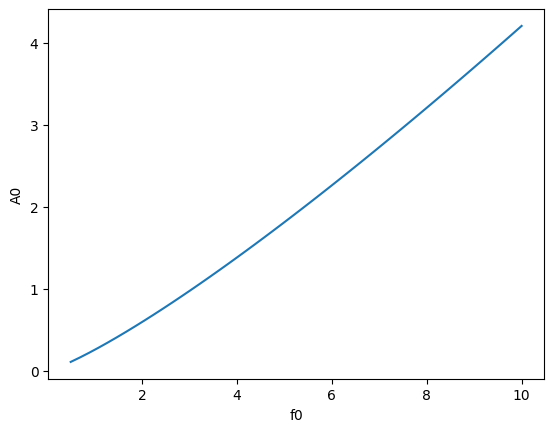

In [111]:
f0_list = np.linspace(0.5, 10, 50)
A0_list = []

params_copy = copy.deepcopy(params)

for f0 in f0_list:
  params_copy['f0'] = f0
  A0_list.append(minimum_productivity(**params_copy))

data = pd.DataFrame({
    'f0': f0_list,
    'A0': A0_list
})

sns.lineplot(data=data, x='f0', y='A0');

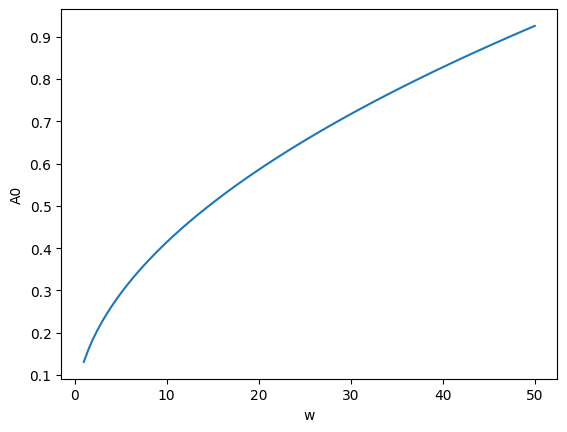

In [110]:
w_list = np.linspace(1, 50, 100)
A0_list = []

params_copy = copy.deepcopy(params)

for w in w_list:
  params_copy['w'] = w
  A0_list.append(minimum_productivity(**params_copy))

data = pd.DataFrame({
    'w': w_list,
    'A0': A0_list
})

sns.lineplot(data=data, x='w', y='A0');

**4. Now write a code to simulate the firms' behavior using the Monte-Carlo Simulation.**

First, we implement the desired simulation with the help of the analytical solution obtained in part 2:

In [26]:
import numpy as np
from scipy.stats import pareto


def optimal_price(w, sigma, alpha, Y, A, P, f0):
  numerator =  w * sigma * (1/alpha) * (Y/A)**(1/alpha) * (1/P)**(-sigma/alpha)
  denominator = (sigma - 1) * Y * P**sigma
  optimal_p = (numerator/denominator) **  (1/(-sigma+sigma/alpha+1))
  return optimal_p

def demand_quantity(price, P, sigma, Y):
  quantity = Y * (price/P)**(-sigma)
  return quantity

def required_labor(production_quantity, A, alpha):
  labor = (production_quantity/A) ** (1/alpha)
  return labor

def minimum_productivity(w, Y , optimal_price, P, sigma, f0):
  numerator =  w**alpha * Y * (optimal_price/P)**(-sigma)
  denominator = (optimal_price * Y * (optimal_price/P)**(-sigma) - f0)**alpha
  A0 = (numerator/denominator)
  return A0

def profit(quantity, price, labor, w, f0):
  revenue = quantity * price
  cost = labor * w + f0
  return revenue - cost


def simulate_firms_behavior_analytical(
    w, sigma, alpha, Y, A_bar, theta, P, f0, sample_size
):
  A = pareto.rvs(b=theta, loc=0, scale=A_bar, size=sample_size)

  price_func = np.vectorize(
      lambda x: optimal_price(w, sigma, alpha, Y, x, P, f0)
  )
  prices = price_func(A)

  demand_func = np.vectorize(
      lambda x: demand_quantity(x, P, sigma, Y)
  )
  quantities = price_func(prices)

  productivity_func = np.vectorize(
      lambda x: required_labor(x, A, alpha)
  )
  labors = price_func(quantities)

  for i in range(prices.shape[0]):
    profit_value = profit(quantities[i], prices[i], labors[i], w, f0)
    if profit_value < 0:
      quantities[i] = 0
      labors[i] = 0

  return prices, quantities, labors

In this part, we use the scipy package to do the simulation numerically. In this way, the optimization of the firm's profit and the calculation of the optimal price are done with this package:

In [116]:
def profit_function(p, w, sigma, alpha, Y, A, P, f0):
  y = Y * (p/P)**(-sigma)
  l = required_labor(y, A, alpha)
  revenue = y * p
  cost = l * w + f0
  profit_value = revenue - cost
  return profit_value


def simulate_firms_behavior_numerical(
    w, sigma, alpha, Y, A_bar, theta, P, f0, sample_size
):
  A = pareto.rvs(b=theta, loc=0, scale=A_bar, size=sample_size)

  price_func = np.vectorize(
      lambda A: minimize(
          lambda p: -profit_function(p, w, sigma, alpha, Y, A, P, f0),
          P, method='nelder-mead',
          options={'xatol': 1e-8, 'disp': False}
      ).x[0]
  )
  prices = price_func(A)

  demand_func = np.vectorize(
      lambda x: demand_quantity(x, P, sigma, Y)
  )
  quantities = price_func(prices)

  productivity_func = np.vectorize(
      lambda x: required_labor(x, A, alpha)
  )
  labors = price_func(quantities)

  for i in range(prices.shape[0]):
    profit_value = profit(quantities[i], prices[i], labors[i], w, f0)
    if profit_value < 0:
      quantities[i] = 0
      labors[i] = 0

  return prices, quantities, labors

**5. Suppose the number of firms is $N = 1000$. Set $\theta = 3.5$, $\bar{A} = 1$, $\sigma = 2.4$ ,  $P = 1$ , $Y = 100$ , $\alpha =
0.5$ , $f_0 = 1.2$. Generate N samples of firms and save them in your memory.**

In the previous part, we implemented Monte Carlo simulation using two different methods. Due to the sensitivity of the analytical solution to the quantization noise, we will use the numerical method for the next sections. \\
(It should be noted that the output of both methods is very close, but still, we use the numerical method to be sure.)

In the first step, we simulate the firms for the required number of samples and obtain their production, price and labor values:

In [117]:
N = 1000

params = {
    'sample_size': N,
    'w': 2,
    'theta': 3.5,
    'A_bar': 1,
    'sigma': 2.4,
    'P': 1,
    'Y': 100,
    'alpha': 0.5,
    'f0': 1.2
}

prices, quantities, labors = simulate_firms_behavior_numerical(**params)

In [119]:
sales = prices * quantities

**6. Plot the distribution of these simulated firms' sales, exports.**

Now we plot the distribution of the salesو quantity, the optimal price  and the labor of the firms:

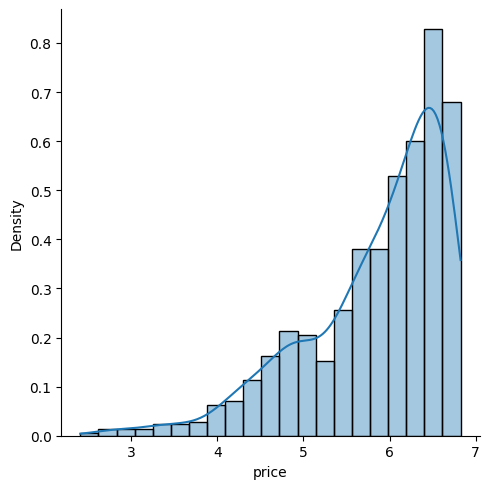

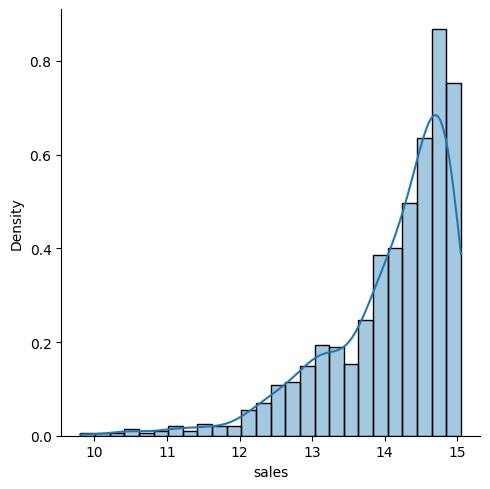

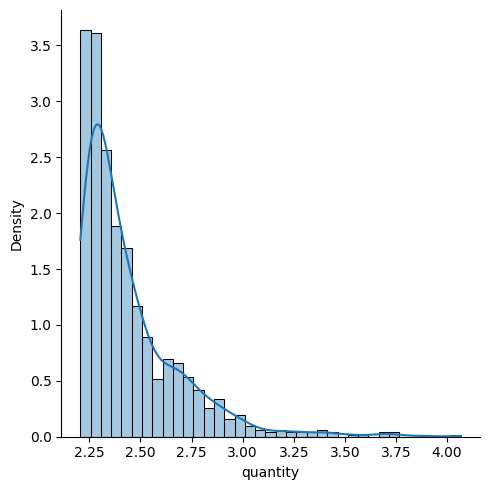

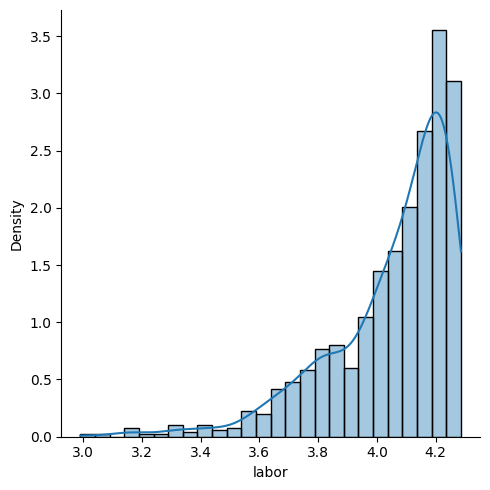

In [125]:
import pandas as pd
import seaborn as sns

simulated_firms = pd.DataFrame({
    'price': prices,
    'sales': sales,
    'quantity': quantities,
    'labor': labors
})

sns.displot(simulated_firms, x='price', kde=True, stat='density', alpha=.4);
sns.displot(simulated_firms, x='sales', kde=True, stat='density', alpha=.4);
sns.displot(simulated_firms, x='quantity', kde=True, stat='density', alpha=.4);
sns.displot(simulated_firms, x='labor', kde=True, stat='density', alpha=.4);